In [51]:
#Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
#Load the datatset

df = pd.read_csv(r"G:\Python\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")

In [53]:
#Viewing first few rows

df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [54]:
#To view the dataset info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [55]:
#To check the number of rows and columns

df.shape

(50, 12)

In [56]:
#To check column names

df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [57]:
#         RAW DATASET
#    ┌────────────────────┐
#    |  All columns       |
#    |  (raw reviews,     |
#    |  ratings, etc.)    |
#    └────────────────────┘
#               │
#               ▼
#    ┌────────────────────┐
#    |  Column Filtering  |
#    |  Keep only useful  |
#    |  cols: date,       |
#    |  title, review,    |
#    |  rating, etc.      |
#    └────────────────────┘
#               │
#               ▼
#    ┌────────────────────┐
#    |  Sentiment Mapping |
#    |  Rating → Positive,|
#    |  Neutral, Negative |
#    └────────────────────┘
#               │
#               ▼
#    ┌────────────────────┐
#    | Language Detection |
#    | Detect review lang |
#    | (en, es, fr, etc.) |
#    └────────────────────┘
#               │
#               ▼
#    ┌────────────────────┐
#    | Text Preprocessing |
#    | - Lowercase        |
#    | - Remove punct.    |
#    | - Remove digits    |
#    | - Tokenize         |
#    | - Remove stopwords |
#    | - Lemmatize        |
#    └────────────────────┘
#               │
#               ▼
#    ┌────────────────────┐
#    |  Clean Dataset     |
#    |  review, clean_    |
#    |  review, sentiment,|
#    |  detected_language |
#    └────────────────────┘


In [58]:
#Import Required Libraries

import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from langdetect import detect

In [59]:
# --------------------------
# Download nltk resources
# --------------------------
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [60]:
# --------------------------
# Keep only necessary columns
# --------------------------
df = df[['date','title','review','rating','username','helpful_votes',
         'review_length','platform','language','location','version','verified_purchase']]

In [61]:

def map_sentiment(rating):
    if rating in [1,2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"
df['sentiment'] = df['rating'].apply(map_sentiment)

In [62]:
# --------------------------
# Initialize text preprocessing tools
# --------------------------
stop_words = set(stopwords.words('english'))
tokenizer = WordPunctTokenizer()
lemmatizer = WordNetLemmatizer()

In [63]:
# --------------------------
# Language Detection
# --------------------------
def detect_lang(text):
    try:
        return detect(str(text))
    except:
        return "unknown"

df['detected_language'] = df['review'].apply(detect_lang)

In [64]:
# --------------------------
# Preprocessing Function
# --------------------------
def preprocess_text(text):
    if pd.isna(text):  
        return ""
    text = text.lower()                               # lowercase
    text = re.sub(r'[^\w\s]', '', text)               # remove punctuation
    text = re.sub(r'\d+', '', text)                   # remove digits
    tokens = tokenizer.tokenize(text)                 # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # stopword removal
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatization
    return " ".join(lemmatized)

In [65]:
# --------------------------
# Apply preprocessing
# --------------------------
df['clean_review'] = df['review'].apply(preprocess_text)
df['clean_title']  = df['title'].apply(preprocess_text)


In [66]:
# --------------------------
# Preview
# --------------------------
print(df[['review','clean_review','detected_language','sentiment']].head())

                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                        clean_review detected_language  \
0  impressive natural language understanding almo...                en   
1  sometimes give wrong answer outdated info stud...                en   
2  great tool generating content quickly interest...                en   
3  great tool generating content quickly start me...                en   
4  excellent language translation grammar fix pri...                en   

  sentiment  
0  Negative  
1  Negative  
2  Positive  
3   Neutral  
4  Negative  


In [67]:
#Null value check

df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
sentiment            0
detected_language    0
clean_review         0
clean_title          0
dtype: int64

In [68]:
# Download cleaned df
df.to_csv("cleaned_reviews.csv", index=False)

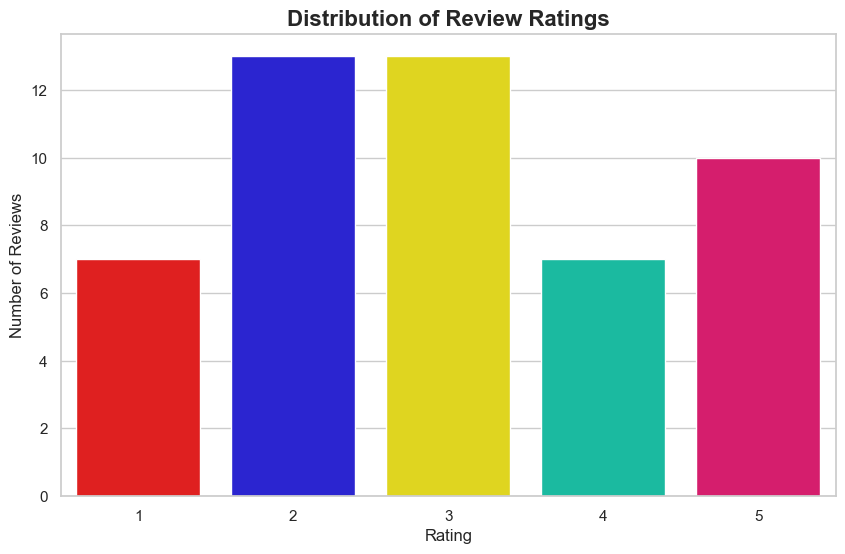

In [69]:
#EDA

# 📊 1. What is the distribution of review ratings?

plt.figure(figsize=(10,6))
ax = sns.countplot(
    x='rating',
    data=df,
    hue='rating',    # explicitly tell seaborn to color by rating
    palette=["#ff0000da", "#1109ec", "#fff200", "#00d5b2fa", "#f30069"],
    legend=False     # avoid duplicate legend
)
plt.title("Distribution of Review Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.show()




In [70]:
print(df['rating'].value_counts().sort_index())    #Counts for each star rating


print(df['rating'].value_counts(normalize=True).sort_index()*100) #Percentage for each star rating


rating
1     7
2    13
3    13
4     7
5    10
Name: count, dtype: int64
rating
1    14.0
2    26.0
3    26.0
4    14.0
5    20.0
Name: proportion, dtype: float64


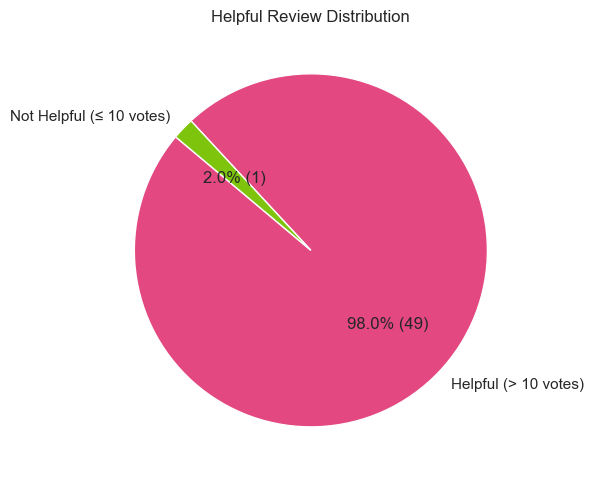

Reviews with > 10 helpful votes: 49
Reviews with ≤ 10 helpful votes: 1


In [71]:
# 👍👎 2. How many reviews were marked as helpful (above a certain threshold)?

# Define helpful vote threshold
threshold = 10

# Create a new column: helpful or not
df['is_helpful'] = df['helpful_votes'] > threshold

# Count helpful vs not helpful (ensure order True/False)
helpful_counts = df['is_helpful'].value_counts().reindex([True, False], fill_value=0)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    helpful_counts,
    labels=[f"Helpful (> {threshold} votes)", f"Not Helpful (≤ {threshold} votes)"],
    autopct=lambda p: f'{p:.1f}% ({int(p*sum(helpful_counts)/100)})',
    startangle=140,
    colors=["#E34881", "#7EC40C"]
)
plt.title('Helpful Review Distribution')
plt.tight_layout()
plt.show()

# Print counts
print("Reviews with >", threshold, "helpful votes:", helpful_counts[True])
print("Reviews with ≤", threshold, "helpful votes:", helpful_counts[False])



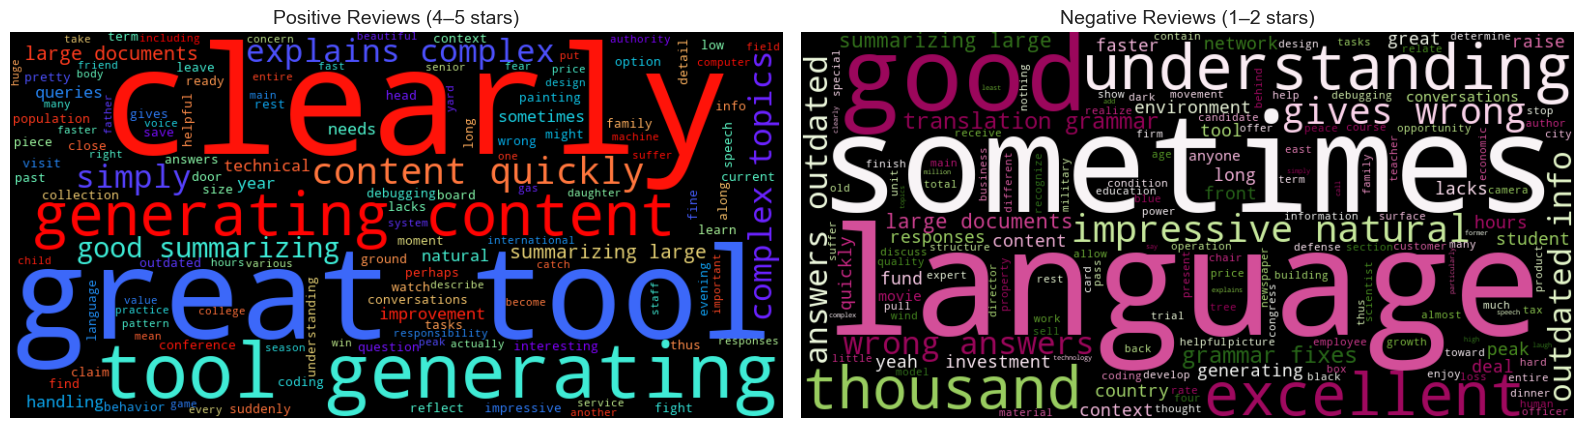

🌟 Top 20 Positive Review Keywords:
[('great', 4), ('tool', 4), ('generating', 4), ('content', 4), ('quickly', 4), ('clearly', 4), ('explains', 3), ('complex', 3), ('topics', 3), ('simply', 3), ('good', 3), ('summarizing', 3), ('large', 3), ('documents', 3), ('natural', 2), ('sometimes', 2), ('needs', 2), ('improvement', 2), ('handling', 2), ('technical', 2)]

⚠️ Top 20 Negative Review Keywords:
[('language', 6), ('sometimes', 5), ('good', 4), ('impressive', 3), ('natural', 3), ('understanding', 3), ('gives', 3), ('wrong', 3), ('answers', 3), ('outdated', 3), ('info', 3), ('excellent', 3), ('translation', 3), ('grammar', 3), ('fixes', 3), ('thousand', 3), ('summarizing', 3), ('large', 3), ('documents', 3), ('student', 2)]


In [72]:
# 🧭 3. What are the most common keywords in positive vs. negative reviews?



# -------------------------------
# 3. Word Clouds + Top Keywords: Positive vs Negative Reviews
# -------------------------------

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
import re

# Define stopwords (remove common words)
stopwords = set(STOPWORDS)

# Helper function to clean and tokenize text
def tokenize(text_series):
    text = " ".join(text_series.dropna().astype(str))  # join all text
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords and len(word) > 2]
    return tokens, " ".join(tokens)

# Split reviews
positive_tokens, positive_text = tokenize(df[df['rating'] >= 4]['review'])
negative_tokens, negative_text = tokenize(df[df['rating'] <= 2]['review'])

# Generate WordClouds
positive_wc = WordCloud(width=800, height=400, background_color="black",
                        stopwords=stopwords, colormap="rainbow").generate(positive_text)

negative_wc = WordCloud(width=800, height=400, background_color="black",
                        stopwords=stopwords, colormap="PiYG").generate(negative_text)

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(positive_wc, interpolation="bilinear")
axes[0].set_title("Positive Reviews (4–5 stars)", fontsize=14)
axes[0].axis("off")

axes[1].imshow(negative_wc, interpolation="bilinear")
axes[1].set_title("Negative Reviews (1–2 stars)", fontsize=14)
axes[1].axis("off")

plt.tight_layout()
plt.show()

# -------------------------------
# Print Top 20 Keywords
# -------------------------------

print("🌟 Top 20 Positive Review Keywords:")
print(Counter(positive_tokens).most_common(20))

print("\n⚠️ Top 20 Negative Review Keywords:")
print(Counter(negative_tokens).most_common(20))


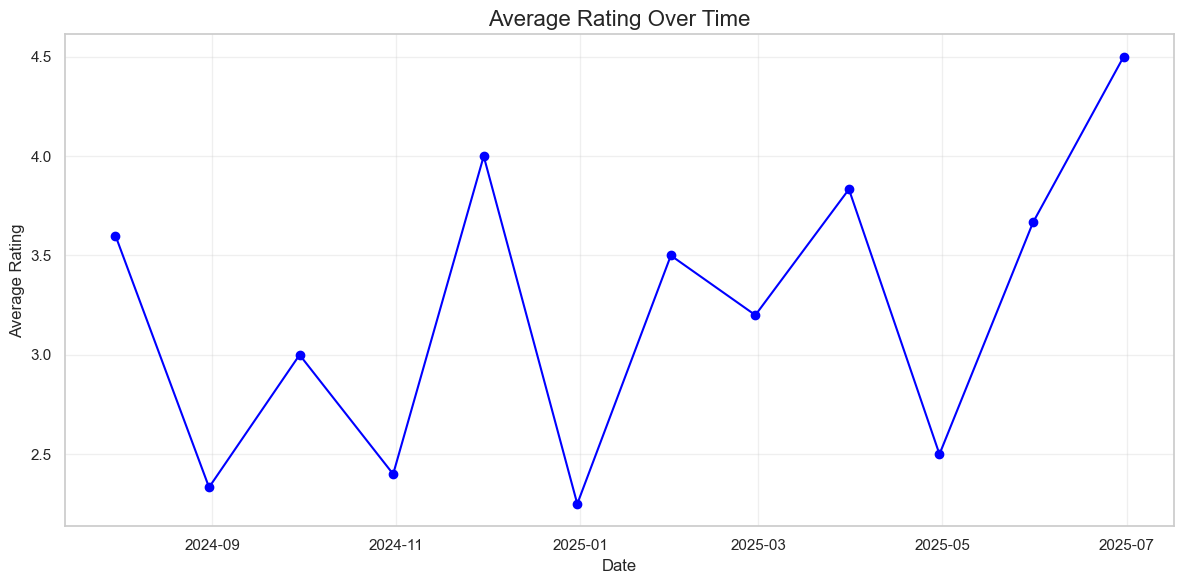

date
2024-07-31    3.600000
2024-08-31    2.333333
2024-09-30    3.000000
2024-10-31    2.400000
2024-11-30    4.000000
Freq: ME, Name: rating, dtype: float64


In [73]:
# 📆 4. How has the average rating changed over time?

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'],errors='coerce')

  # Group by month (you can also do by 'W' for week, or 'D' for day)
rating_trend = df.groupby(pd.Grouper(key='date', freq='ME'))['rating'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rating_trend.index, rating_trend.values, marker='o', linestyle='-', color='blue')

plt.title("Average Rating Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print first few values for quick check
print(rating_trend.head())


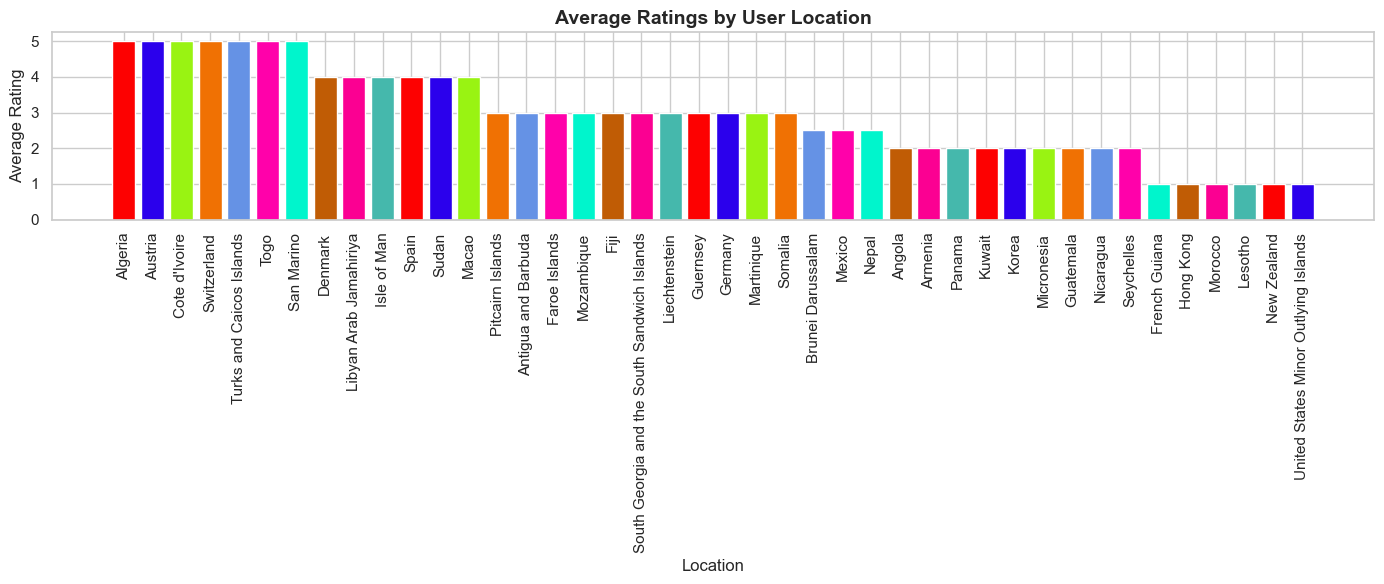

In [74]:
# 🌍 5. How do ratings vary by user location?

# Group by location and calculate average rating
avg_rating_by_location = df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Now plot
plt.figure(figsize=(14, 6))

colors = ["#FD0101", "#2B00EC", "#99F312", "#F07103", "#6592E5",
          "#FF01AA", "#00F5CC", "#C05C05", "#FB0092FF", "#45B8AC"]

plt.bar(
    avg_rating_by_location.index,
    avg_rating_by_location.values,
    color=colors[:len(avg_rating_by_location)]
)

plt.xticks(rotation=90)
plt.title('Average Ratings by User Location', fontsize=14, fontweight="bold")
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()





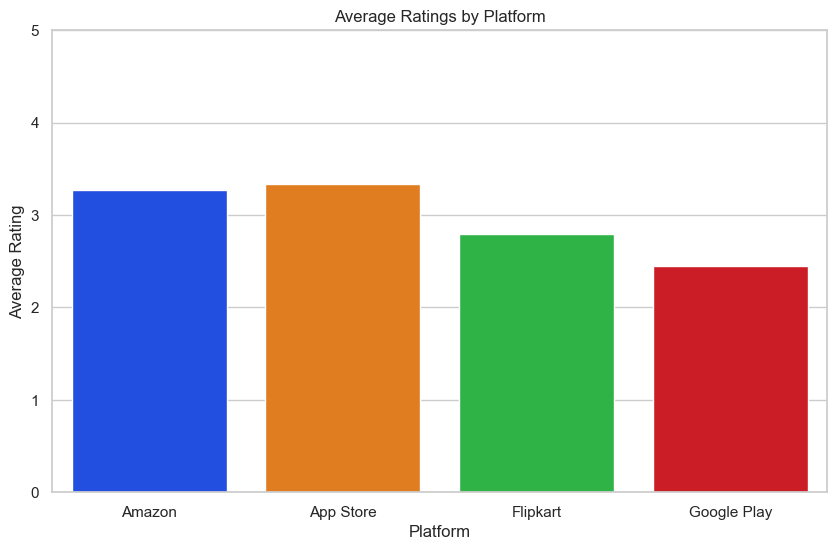

In [75]:
# 🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?



avg_rating_by_platform = df.groupby('platform')['rating'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_rating_by_platform,
    x='platform',
    y='rating',
    hue='platform',
    palette='bright',
    legend=False
)
plt.title("Average Ratings by Platform")
plt.ylabel("Average Rating")
plt.xlabel("Platform")
plt.ylim(0, 5)
plt.show()


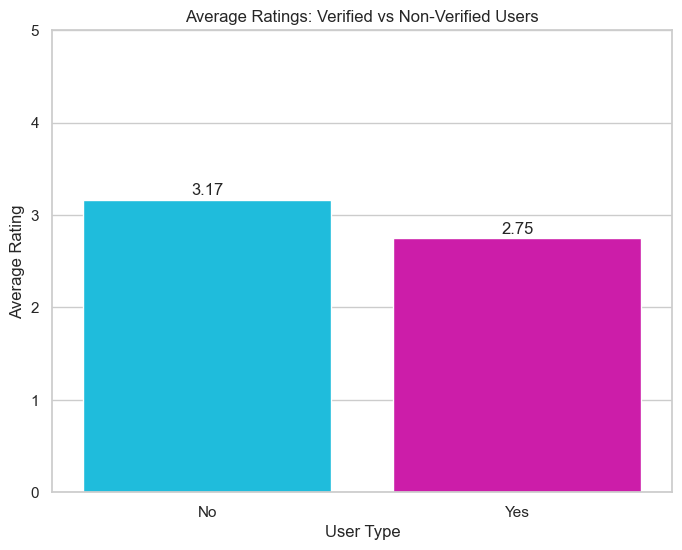

In [76]:
# ✅❌ 7. Are verified users more satisfied than non-verified ones?

# Group by verified purchase status and calculate average rating
avg_rating_verified = df.groupby('verified_purchase')['rating'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=avg_rating_verified,
    x='verified_purchase',    # categories on x-axis
    y='rating',
    hue='verified_purchase',  # color by group
    palette=["#00D1FBC8", "#E900BA"],
    legend=False
)

# Add text labels on top of bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,   # x-position
        p.get_height() + 0.05,         # y-position just above bar
        f'{p.get_height():.2f}',       # value formatted to 2 decimals
        ha='center'
    )

plt.title("Average Ratings: Verified vs Non-Verified Users")
plt.ylabel("Average Rating")
plt.xlabel("User Type")
plt.ylim(0, 5)  # since ratings are 1–5
plt.show()


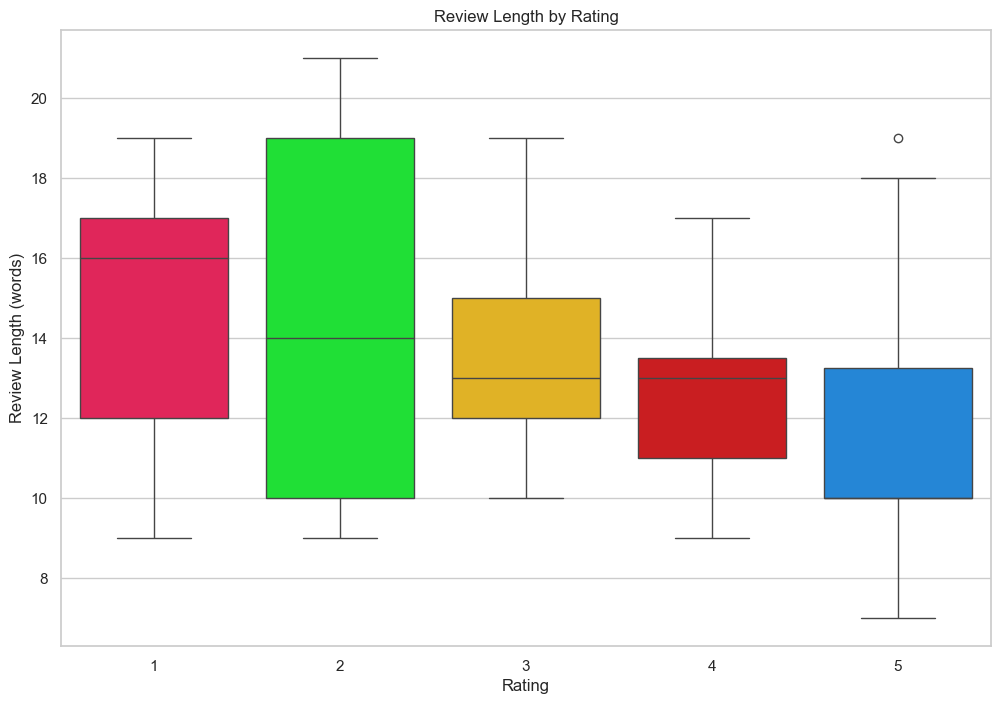

In [77]:
# 🔠 8. What’s the average length of reviews per rating category?

# Calculate review length
df['review_length'] = df['review'].str.split().str.len()

# Define custom colors for ratings 1–5
custom_colors = ["#FF074D", "#00FF1E", "#FFC107", "#E60105", "#0889F3"]

plt.figure(figsize=(12,8))
sns.boxplot(
    data=df,
    x='rating',
    y='review_length',
    hue='rating',          # tie colors to rating values
    palette=custom_colors, # use your custom set
    legend=False
)

plt.title("Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (words)")
plt.show()


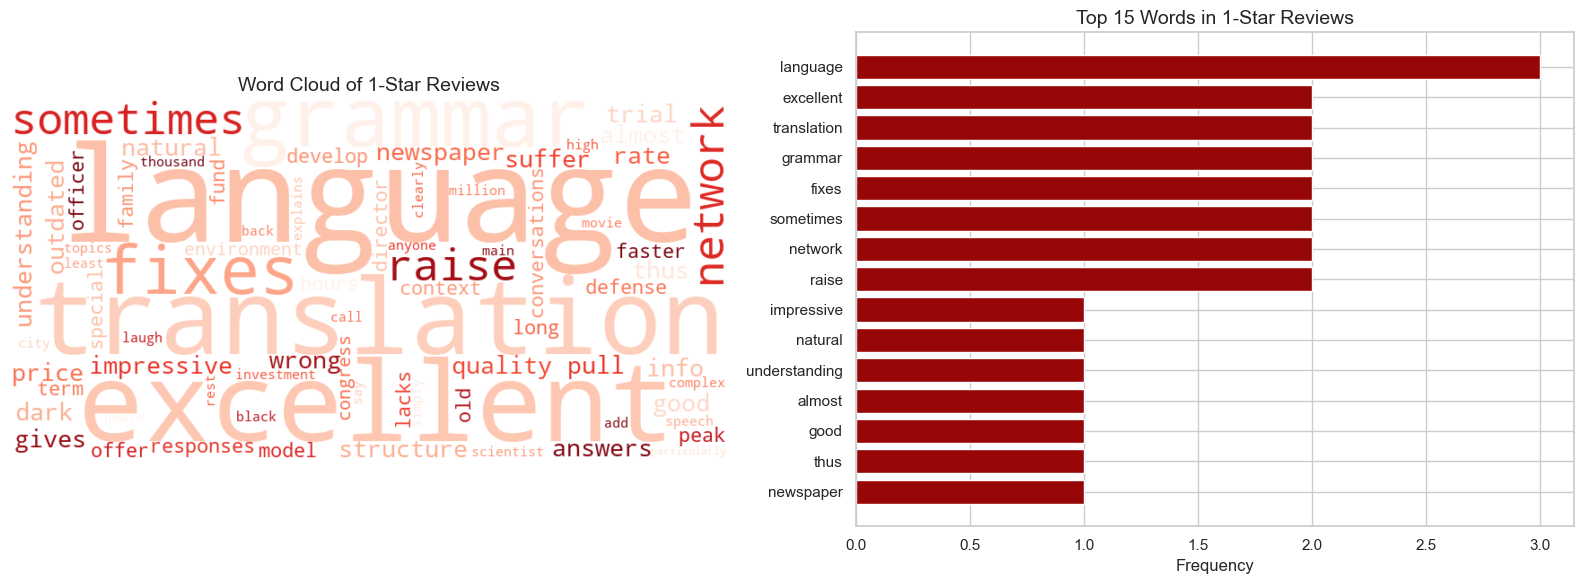

In [78]:
# 💬 9. What are the most mentioned words in 1-star reviews?

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Extract and clean 1-star reviews
one_star_reviews = df[df['rating'] == 1]['review'].dropna().str.lower().tolist()

# Join into single text
text = " ".join(one_star_reviews)

# Basic cleanup (remove punctuation/numbers)
text = re.sub(r"[^a-z\s]", "", text)

# Tokenize
words = text.split()

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "use", "one"])  # add custom removals

# Filter words
filtered_words = [w for w in words if w not in stopwords and len(w) > 2]

# --- Word Cloud ---
wordcloud = WordCloud(
    width=800, height=400, background_color="white",
    colormap="Reds", max_words=100, stopwords=stopwords
).generate(" ".join(filtered_words))

# --- Bar Chart (Top 15 words) ---
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(15)
words_df = pd.DataFrame(common_words, columns=["word", "count"])

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: WordCloud
axes[0].imshow(wordcloud, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud of 1-Star Reviews", fontsize=14)

# Right: Bar chart
axes[1].barh(words_df["word"], words_df["count"], color="#980707")
axes[1].invert_yaxis()  # largest on top
axes[1].set_title("Top 15 Words in 1-Star Reviews", fontsize=14)
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()



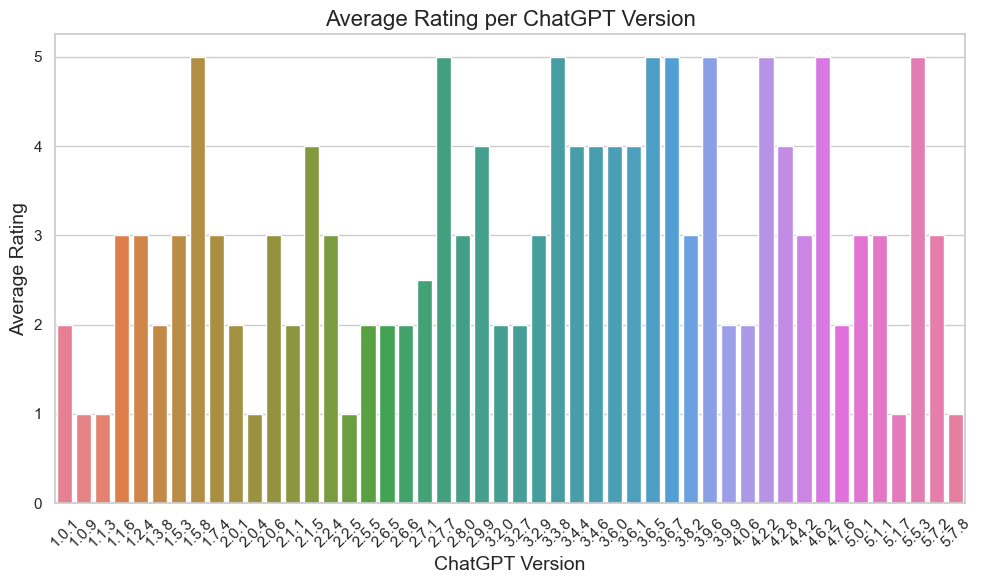

In [79]:
# 📱🧪 10. What ChatGPT version received the highest average rating?


# Calculate average rating per version
avg_ratings = df.groupby('version')['rating'].mean().reset_index()

# Set seaborn style
sns.set(style='whitegrid')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='version',
    y='rating',
    hue='version',         # tell seaborn: color by version
    data=avg_ratings,
    palette='husl',
    legend=False           # avoid duplicate legend
)
plt.title('Average Rating per ChatGPT Version', fontsize=16)
plt.xlabel('ChatGPT Version', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
# ===== Sentiment (Positive / Neutral / Negative) with TF-IDF + Linear Model =====
import pandas as pd, numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score,confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import joblib, re

In [81]:
# --- light text normalization function for TF-IDF ---
def normalize_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)     # drop urls
    s = re.sub(r"[^a-z0-9' ]", " ", s)          # keep alnum and apostrophes
    s = re.sub(r"\s+", " ", s).strip()
    return s

X = df["review"].fillna("").map(normalize_text)
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [82]:
# class weights for imbalance
classes = np.unique(y_train)
weights = compute_class_weight("balanced", classes=classes, y=y_train)
cw = {c:w for c,w in zip(classes, weights)}

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=60000,
        ngram_range=(1,2),
        strip_accents="unicode",
        lowercase=False,  # we already lowercased in normalize_text
        min_df=2
    )),
    ("clf", LogisticRegression(
        solver="liblinear", max_iter=2000, class_weight=cw
    ))
])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, pred), 4))
print("Macro-F1:", round(f1_score(y_test, pred, average="macro"), 4))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.1
Macro-F1: 0.0952
              precision    recall  f1-score   support

    Negative      0.333     0.250     0.286         4
     Neutral      0.000     0.000     0.000         3
    Positive      0.000     0.000     0.000         3

    accuracy                          0.100        10
   macro avg      0.111     0.083     0.095        10
weighted avg      0.133     0.100     0.114        10



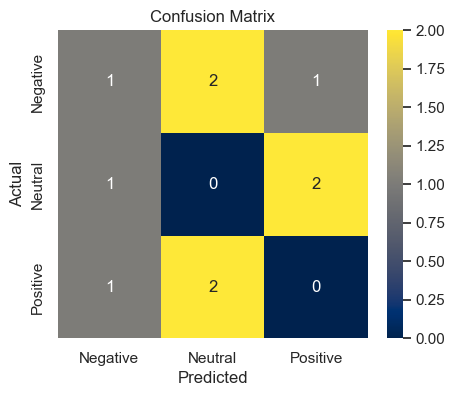

In [83]:
# Confusion matrix
cm = confusion_matrix(y_test, pred, labels=classes)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [84]:
import numpy as np
import re
import contractions
import emoji

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
# ===============================
# 3. Preprocessing
# ===============================

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Convert emojis to words
def convert_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

# Clean text
def clean_text(text):
    text = text.lower()
    text = expand_contractions(text)
    text = convert_emojis(text)
    text = re.sub(r"http\S+", " ", text)       # remove links
    text = re.sub(r"[^a-zA-Z\s]", " ", text)   # remove special chars/numbers
    text = re.sub(r"\s+", " ", text).strip()   # remove extra spaces
    return text

df["clean_review"] = df["review"].apply(clean_text)

In [86]:
# ===============================
# 4. Labels
# ===============================
le = LabelEncoder()
df["label"] = le.fit_transform(df["sentiment"])   # 0,1,2

X = df["clean_review"].values
y = df["label"].values

In [87]:
# ===============================
# 5. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [88]:
# ===============================
# 6. Tokenization & Padding
# ===============================
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


In [89]:
# ===============================
# 7. Build Model
# ===============================
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=max_words, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,383,043 (5.28 MB)

 Trainable params: 1,383,043 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

None


In [90]:
# ===============================
# 8. Train
# ===============================
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - accuracy: 0.4000 - loss: 1.0999 - val_accuracy: 0.3000 - val_loss: 1.1007
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4000 - loss: 1.0941 - val_accuracy: 0.3000 - val_loss: 1.1014
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.4750 - loss: 1.0895 - val_accuracy: 0.2000 - val_loss: 1.1015
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.3250 - loss: 1.0946 - val_accuracy: 0.3000 - val_loss: 1.1015
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.3500 - loss: 1.0869 - val_accuracy: 0.4000 - val_loss: 1.1018
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4500 - loss: 1.0760 - val_accuracy: 0.3000 - val_loss: 1.1036
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6250 - loss: 1.0566 - val_accuracy: 0.3000 - val_loss: 1.1071
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5250 - loss: 1.0558 - val_accuracy: 0.3000 - val_loss: 1.1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.25      0.25      0.25         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.33      0.67      0.44         3

    accuracy                           0.30        10
   macro avg       0.19      0.31      0.23        10
weighted avg       0.20      0.30      0.23        10


Confusion Matrix:


g:\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


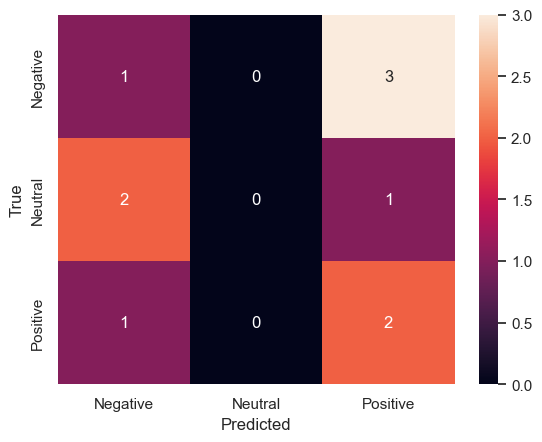

In [91]:
# ===============================
# 9. Evaluate
# ===============================
y_pred = model.predict(X_test_pad).argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

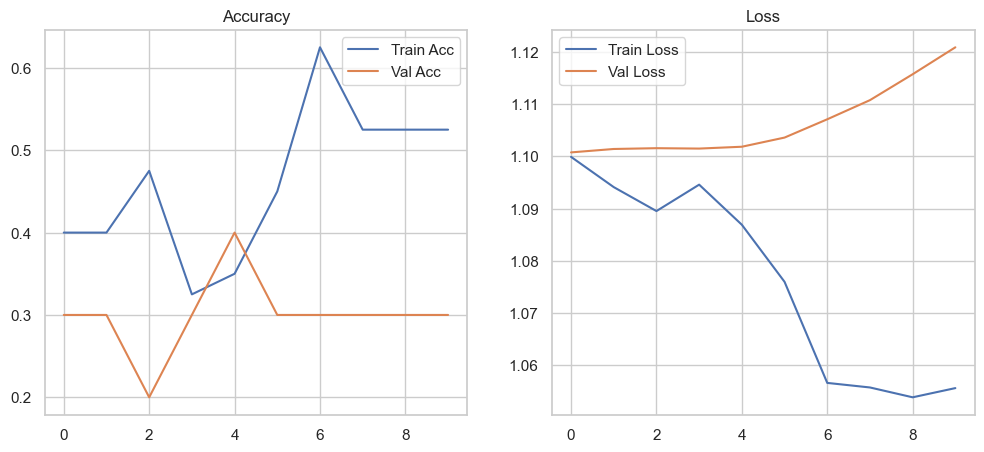

In [92]:
# ===============================
# 10. Plot Training Curves
# ===============================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.show()

In [93]:
import joblib

# Save pipeline
joblib.dump(pipeline, "sentiment_tfidf_pipeline.pkl")

# Load later
sentiment_tfidf_pipeline = joblib.load("sentiment_tfidf_pipeline.pkl")


In [94]:
#Save

model.save("sentiment_dl_model.keras")

#Load

from tensorflow.keras.models import load_model
sentiment_dl_model = load_model("sentiment_dl_model.keras")

